<a href="https://colab.research.google.com/github/sudhakar-43/-Identifying-Shopping-Trends-using-Data-Analysis/blob/main/Identifying_Shopping_Trends_using_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



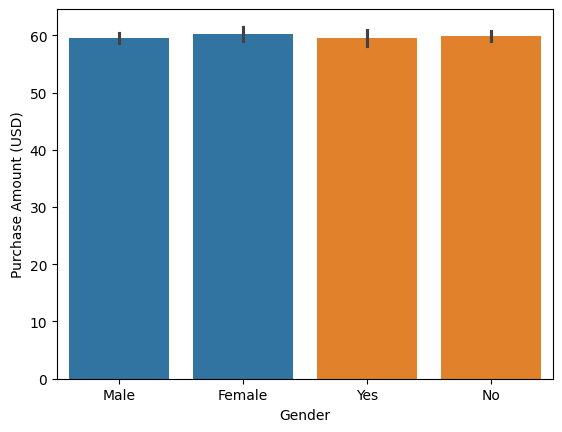

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


shop = pd.read_csv('/content/shopping_trends_updated.csv')
shop.shape
shop.to_excel('shopping_trends_updated.xlsx')
shop.head()
shop.dtypes
shop.columns
shop.info()
shop.shape
shop.isnull().sum()
print(f"The unique values of the 'Gender' column are: {shop['Gender'].unique()}")
print(f"The unique values of the 'Category' column are: {shop['Category'].unique()}")
print(f"The unique values of the 'Size' column are: {shop['Size'].unique()}")
print(f"The unique values of the 'Subscription Status' column are: {shop['Subscription Status'].unique()}")
print(f"The unique values of the 'Shipping Type' column are: {shop['Shipping Type'].unique()}")
print(f"The unique values of the 'Discount Applied' column are: {shop['Discount Applied'].unique()}")
print(f"The unique values of the 'Promo Code Used' column are: {shop['Promo Code Used'].unique()}")
print(f"The unique values of the 'Payment Method' column are: {shop['Payment Method'].unique()}")


shop['Age_category'] = pd.cut(shop['Age'], bins=[0, 15, 18, 30, 50, 70], labels=['child', 'teen', 'Young Adults', 'Middle-Aged Adults', 'old'])
fig = px.histogram(shop, y='Age', x='Age_category')
fig.show()

shop.groupby('Category')['Purchase Amount (USD)'].mean()

sns.barplot(shop, x='Gender', y='Purchase Amount (USD)')

shop.groupby('Category')['Item Purchased'].value_counts()
fig = px.histogram(shop, x='Item Purchased', color='Category')
fig.show()

fig = px.histogram(shop, x='Season', range_y=[200, 1500])
fig.show()

shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()
fig = px.bar(shop_groupby, x='Category', y='Review Rating')
fig.show()

sns.barplot(shop, x='Subscription Status', y='Purchase Amount (USD)')
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()
fig = px.bar(shop_groupby, x='Payment Method', y='Purchase Amount (USD)')
fig.show()

shop_groupby = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()
fig = px.bar(shop_groupby, x='Promo Code Used', y='Purchase Amount (USD)')
fig.show()

shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()
px.sunburst(shop, path=['Frequency of Purchases', 'Age_category'], values='Age')

shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()
fig = px.bar(shop_group, x='Size', y='Purchase Amount (USD)')
fig.show()

shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending=False)

shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()
px.histogram(shop_group, x='Discount Applied', y='Purchase Amount (USD)')
fig = px.sunburst(shop, path=['Gender', 'Discount Applied'], values='Purchase Amount (USD)', color='Gender')
fig.show()

px.histogram(shop, x='Color')
shop['Color'].value_counts().nlargest(5)

shop['Previous Purchases'].mean()

shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()
fig = px.bar(shop_group, x='Location', y='Purchase Amount (USD)')
fig.show()

shop_group = shop.groupby('Category')['Age'].mean().reset_index()
fig = px.bar(shop_group, y='Age', x='Category')
fig.show()

shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()
fig = px.bar(shop_group, x='Gender', y='Purchase Amount (USD)')
fig.show()

px.sunburst(data_frame=shop, path=['Gender', 'Age_category'], values='Purchase Amount (USD)')
